# 3.6.4 Melbourne Housing Prices Challenge

__Source:__ [Kaggle Data Set](https://www.kaggle.com/anthonypino/melbourne-housing-market)

__Description from Kaggle Site:__ Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe someone can find a trend or give a prediction? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should I buy a 2 bedroom unit?

In [1]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

In [2]:
#importing csv and inspecting head of data
mhd = pd.read_csv('Melbourne_housing_FULL.csv')
mhd.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
#inspecting null values in the data set
mhd.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

This data set is missing a number of values in the following columns: Price, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Lattitude, Longitude.  There are also less than 5 values missing from the following columns: Distance, Postcode, CouncilArea, Regionname, and Propertycount.

Now let's further inspect the types of each column.

In [4]:
mhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

All of these make sense, except the Date needs to be changed to a date object.

In [5]:
#converting date to a date object
mhd['Date'] = pd.to_datetime(mhd['Date'])

In [6]:
#inspecting spread of data
mhd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Three observations from inspecting the data spread:

1. Rooms and Bedroom2 columns are very similar, yet Bedroom2 has fewer entries.  From the description of the data, Bedroom2 was scraped from a different source.
2. There are building areas, land sizes, and bathrooms with values of 0.00. This doesn't make sense.  
3. There was a building built in 1196, which seems shocking.

I will inspect each of these items to determine next steps.

In [7]:
mhd['room_dif'] = mhd['Rooms'] - mhd['Bedroom2']
print('Max Difference: ', mhd.room_dif.max())
print('Min Difference: ', mhd.room_dif.min())
print('Mean Difference: ', mhd.room_dif.mean())
print('\nCount of Value Differences: ')
mhd.room_dif.value_counts()

Max Difference:  8.0
Min Difference:  -27.0
Mean Difference:  0.016253753753753753

Count of Value Differences: 


 0.0     25692
 1.0       569
-1.0       248
 2.0        77
-2.0        23
 3.0        18
 4.0         4
-6.0         2
-3.0         2
-7.0         1
-17.0        1
-27.0        1
-5.0         1
 8.0         1
Name: room_dif, dtype: int64

Most differences between Rooms and Bedroom2 are zero or one in either direction.  The largest difference is 27 rooms.  Because the majority of values are equal to each other and that Rooms has more non-null values, I will drop the Bedroom2 column from the dataset.

In [8]:
#dropping Bedroom2 and the room_dif columns
mhd = mhd.drop(['Bedroom2', 'room_dif'], axis=1)

In [9]:
#inspecting properties with building areas of zero
print('Number of properties with Land Size of Zero:', mhd.Landsize[mhd.Landsize == 0].count())
print('Number of properties with Building Area of Zero:', mhd.BuildingArea[mhd.BuildingArea == 0].count())
print('Number of properties with Zero Bathrooms:', mhd.Bathroom[mhd.Bathroom == 0].count()) 

Number of properties with Land Size of Zero: 2437
Number of properties with Building Area of Zero: 76
Number of properties with Zero Bathrooms: 46


In [10]:
mhd[mhd.Bathroom ==0].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
228,Alphington,6 Naroon Rd,3,h,1485000.0,SP,McGrath,2016-08-28,6.4,3078.0,0.0,0.0,597.0,NaN,NaN,Darebin City Council,-37.7781,145.0284,Northern Metropolitan,2211.0
481,Armadale,3/50 Denbigh Rd,2,u,546000.0,SP,hockingstuart,2016-07-30,6.3,3143.0,0.0,0.0,0.0,NaN,NaN,Stonnington City Council,-37.8568,145.0161,Southern Metropolitan,4836.0
845,Balaclava,5/11 Albion St,2,u,497500.0,PI,hockingstuart,2016-08-28,6.6,3183.0,0.0,0.0,0.0,NaN,NaN,Port Phillip City Council,-37.8739,144.9929,Southern Metropolitan,2952.0
1009,Balwyn,5 Shrimpton Ct,2,h,1010000.0,PI,Marshall,2016-07-30,9.7,3103.0,0.0,0.0,1611.0,NaN,NaN,Boroondara City Council,-37.8092,145.1016,Southern Metropolitan,5682.0
1549,Bentleigh East,579 Warrigal Rd,3,h,700000.0,S,Thomson,2016-05-22,13.9,3165.0,0.0,0.0,456.0,NaN,NaN,Glen Eira City Council,-37.9314,145.0808,Southern Metropolitan,10969.0


Because a good number of properties that have zero bathrooms listed also have missing values for other characteristics, I will prepare two separate data sets, one with missing values dropped and one with imputed values in place of the missing values.  Because a building would not be a legal property without a bathroom, I will set all properties with zero bathrooms to one.

In [11]:
#setting all properties with zero bathrooms to one
mhd.Bathroom = mhd.Bathroom.map(lambda x: x if x>0 else 1)

Based on my prior knowledge of real estate pricing, a lot of weight is placed on square footage.  In this data set, the similar attribute is Building Area.  The zero values of Building Area, I will turn to None, which will be dropped or imputed in the data, depending on the method.

In [12]:
#setting all properties with Building Area of zero to none and inspecting data
mhd.BuildingArea = mhd.BuildingArea.map(lambda x: x if x>0 else None)
mhd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bathroom,34857.0,1.478670e+00,0.684478,1.00000,1.00000,1.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13666.0,1.611476e+02,402.202853,0.01000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


Based on some brief research, if the Land Size of a property is zero, it could be that the building backs up to the property line and there is no discernable land outside of the building structure.  For this reason, I will leave the Land Size category alone, and a value of zero is understandable.

### Missing Values: Imputing Data
I will use the Imputer funcation to impute the median of each category for missing values in the data set.  Using the median, the outliers don't impact the entire data set as much as if we'd used the mean.

Before imputing data through sklearn, we need to make sure no categorical data is null because the imputer won't understand median for these values.  

In [13]:
#removing rows with null values in categorical columns
mhd_to_transf = mhd.dropna(axis=0,subset=['Regionname', 'CouncilArea', 'Propertycount'])

#separating into categorical and continuous data
mhd_cat = mhd_to_transf[['Suburb', 'Address', 'Type', 'Method', 'SellerG', 
                     'Date', 'Regionname', 'CouncilArea']]
mhd_cont = mhd_to_transf.loc[:,~(mhd.columns.isin(mhd_cat.columns))]

#inspecting for null values
print(mhd_cat.isnull().sum())
print()
print(mhd_cont.isnull().sum())

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
Regionname     0
CouncilArea    0
dtype: int64

Rooms                0
Price             7610
Distance             0
Postcode             0
Bathroom             0
Car               8725
Landsize         11807
BuildingArea     21188
YearBuilt        19303
Lattitude         7973
Longtitude        7973
Propertycount        0
dtype: int64


Now that the null categorical values have been removed, we can use the Imputer from sklearn to impute median values

In [14]:
from sklearn.preprocessing import Imputer
#fill missing values with median values
imputer = Imputer(strategy='median')
mhd_transformed = pd.DataFrame(imputer.fit_transform(mhd_cont), 
                               columns=[mhd_cont.columns])

In [15]:
#inspecting that all values are non-null
mhd_transformed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34854.0,3.031072e+00,0.969943,1.00000,2.0000,3.0000,4.000000e+00,1.600000e+01
Price,34854.0,1.010863e+06,572016.721463,85000.00000,695000.0000,870000.0000,1.150000e+06,1.120000e+07
Distance,34854.0,1.118520e+01,6.788983,0.00000,6.4000,10.3000,1.400000e+01,4.810000e+01
Postcode,34854.0,3.116066e+03,109.025570,3000.00000,3051.0000,3103.0000,3.156000e+03,3.978000e+03
Bathroom,34854.0,1.478711e+00,0.684493,1.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,34854.0,1.796723e+00,0.883005,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,34854.0,5.690057e+02,2764.026645,0.00000,357.0000,521.0000,5.980000e+02,4.330140e+05
BuildingArea,34854.0,1.458602e+02,252.142098,0.01000,136.0000,136.0000,1.360000e+02,4.451500e+04
YearBuilt,34854.0,1.967898e+03,25.043118,1196.00000,1970.0000,1970.0000,1.970000e+03,2.106000e+03
Lattitude,34854.0,-3.780994e+01,0.079293,-38.19043,-37.8469,-37.8076,-3.777089e+01,-3.739020e+01


Now all counts of values are equal, meaning there are the same numbers of values in each column.  Next, we will add back in all of the categorical data to then create and train models. 

In [16]:
#list of data frames to concatenate and then combine
dfs = [mhd_transformed, mhd_cat]
mhd_t = pd.concat(dfs, axis=1)
print(mhd_t.columns)
#renaming columns back to their original names and inspecting the data frame.
mhd_t.columns=(['Rooms', 'Price','Distance','Postcode','Bathroom','Car',
                'Landsize','BuildingArea','YearBuilt','Latitude',
                'Longitude','Propertycount','Suburb','Address','Type',
               'Method','SellerG','Date','Regionname','CouncilArea'])
mhd_t.head()

Index([        ('Rooms',),         ('Price',),      ('Distance',),
            ('Postcode',),      ('Bathroom',),           ('Car',),
            ('Landsize',),  ('BuildingArea',),     ('YearBuilt',),
           ('Lattitude',),    ('Longtitude',), ('Propertycount',),
                 'Suburb',          'Address',             'Type',
                 'Method',          'SellerG',             'Date',
             'Regionname',      'CouncilArea'],
      dtype='object')


,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
0,2.0,870000.0,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,4019.0,Abbotsford,68 Studley St,h,SS,Jellis,2016-03-09,Northern Metropolitan,Yarra City Council
1,2.0,1480000.0,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,4019.0,Abbotsford,85 Turner St,h,S,Biggin,2016-03-12,Northern Metropolitan,Yarra City Council
2,2.0,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,Abbotsford,25 Bloomburg St,h,S,Biggin,2016-04-02,Northern Metropolitan,Yarra City Council
3,3.0,870000.0,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,4019.0,Abbotsford,18/659 Victoria St,u,VB,Rounds,2016-04-02,Northern Metropolitan,Yarra City Council
4,3.0,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,Abbotsford,5 Charles St,h,SP,Biggin,2017-04-03,Northern Metropolitan,Yarra City Council


Now that the data set has been cleaned and imputed, we can explore the data to identify features.

## Exploring the Data
Exploring the distribution of property prices

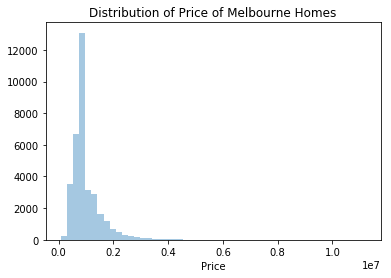

In [17]:
#plotting the distribution of prices of homes
sns.distplot(mhd_t['Price'].dropna(), kde=False)
plt.title('Distribution of Price of Melbourne Homes')
plt.show()

The price of properties is skewed right, with the center just below $1,000,000.  Let's inspect the distribution of price amongst the categorical variables, Type, Method, and Region Name.  We will not inspect Suburb, or Address, as the Region Name is a more generalized description of the two.  We will also not inspect the Real Estate Seller information.

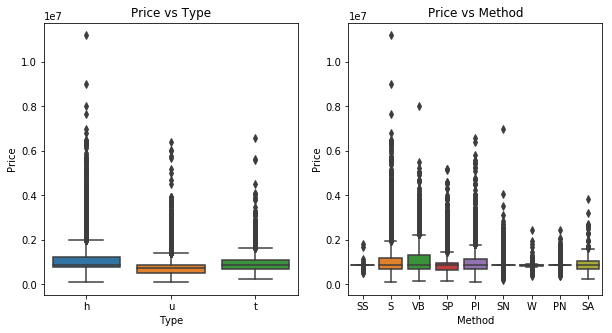

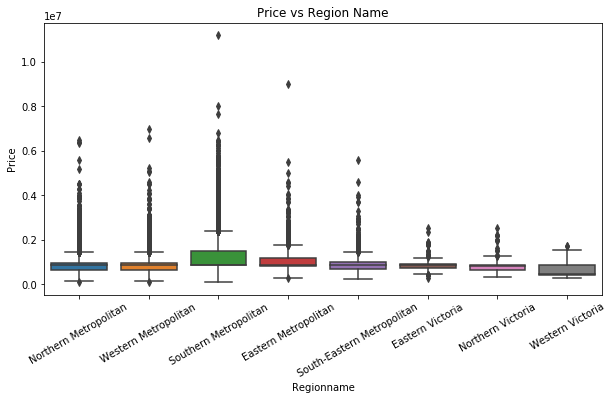

In [18]:
#boxplots of price versus categorical data 
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='Type', y='Price', data=mhd_t)
plt.title('Price vs Type')

plt.subplot(1,2,2)
sns.boxplot(x='Method', y='Price', data=mhd_t)
plt.title('Price vs Method')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Regionname', y='Price', data=mhd_t)
plt.title('Price vs Region Name')
plt.xticks(rotation=30)
plt.show()

Prices of homes are greater than that of townhomes, and both of which sold at a higher price than condo units. Homes sold at a median price of just over \$1 million, townhomes around \$800 thousand, and condo units around $700 thousand. 

The highest price is gained when a property is sold, not passed in or vendor bid. 

The region that had the highest sales price was the Southern Metropolitan region, followed by the Eastern Metropolitan region and the South-Eastern Meetropolitan Region.  The lowest sales price occurred in the Western Victoria Region.

In [19]:
print(mhd_cont.columns)

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


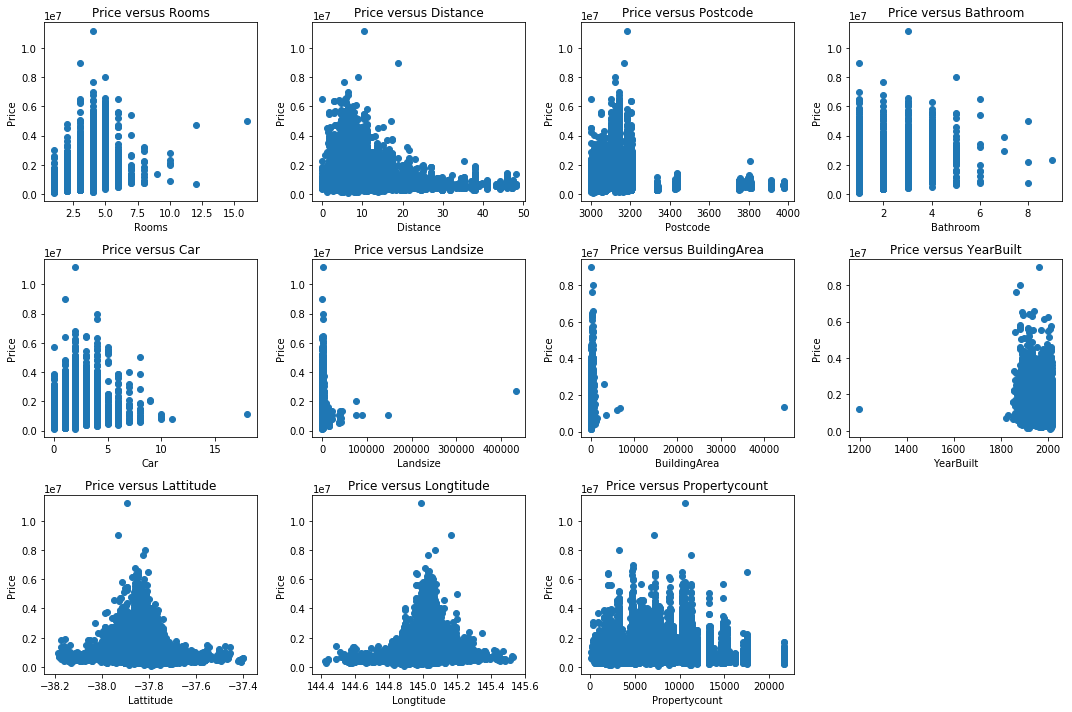

In [20]:
plt.figure(figsize=(15,10))
i=1

for col in mhd_cont.columns.drop('Price'):
    plt.subplot(3,4,i)
    plt.scatter(x=mhd_cont[col], y=mhd_cont['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title('Price versus {}'.format(col))
    i+=1

plt.tight_layout()
plt.show()

Most of the values are skewed to the right, with the exception of longitude and latitude, which are more normally distributed.

There are outliers in Landsize, Building area, and Year Built.  It is challenging to make any more statements about the data because of this skewed plot.

The highest priced properties have around 4 rooms, are close to the city center, have around 3 bathrooms, space for 2 cars to park, and a moderate number of properties in the district. 

It will help to observe the correlation between values.  We can do this through a heat map of the person correlation constants.

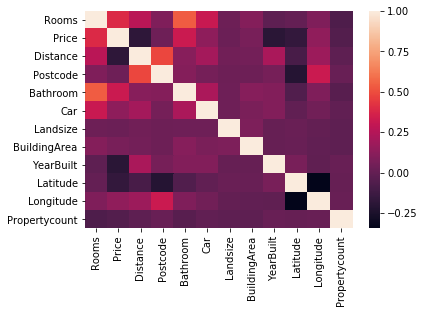

In [21]:
#making and plotting heatmap
corrmat = mhd_t.corr()
sns.heatmap(corrmat)
plt.show()

The price of the sale is related to number of rooms, bathrooms, parking, and longitude.  We will make those features to fit with models. 

With the exception of price, most of the categories are not hightly correlated to one another with the exception of number of bathrooms and number of rooms, and slightly longitude and postcode.  Interestingly enough, postcode is not related to latitide. For this reason, I will drop latitude, and since longitude is more highly correlated with price, I will keep longitude and drop price. 

I will also engineer a new feature that represents the number of rooms per bathroom to capture the relationship between the two, but making them less correlated.

### Feature Engineering - Imputed Data

In addition to features mentioned above, some other features that might be important to model the price of the home would be if the home is historic or not.

In [22]:
#creating features dataframe with price, rooms, parking, longitude, distance, and landsize
features_i = mhd_t[['Price', 'Rooms', 'Car', 'Longitude', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']]

#creating rooms per bathroom feature
features_i['Rooms_per_bathroom'] = mhd_t['Rooms'] / mhd_t['Bathroom']

#creating historic homes feature
features_i['Historic'] = np.where(mhd_t['YearBuilt'] < (2017-50), 1,0)

features_i = features_i.dropna()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Linear Regression Model - Imputed Data
I will use a linear regression model to predict the price of homes.  I'll start by identifying variable and splitting into train and test sets.

In [23]:
#identify variables
Xi = features_i.drop('Price', axis=1)
Yi = features_i['Price']

#split into train and test sets
Xi_train, Xi_test, Yi_train, Yi_test = train_test_split(Xi, Yi, test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(Xi_train, Yi_train)
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)

Coefficients: [ 2.76975361e+05  4.24765202e+04  8.10143725e+05 -2.58282961e+04
  4.71782300e+00  4.96378253e+01 -3.63885537e+03 -6.68886083e+04
 -2.96954895e+04]
Intercept: -109780901.78041416


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [25]:
print('R-squared:', linreg.score(Xi_train, Yi_train))
print(cross_val_score(linreg, Xi_train, Yi_train))

R-squared: 0.29310924569985763
[0.30740864 0.27214461 0.22114485]


This is a pretty terrible R-squared value for the regression.  This model only explains variation in 29% of the data. After cross validation it appears that there is something odd occurring in the middle fold where the accuracy of the model drops to 17%. Let's try the test set to see how well this model predicts for that set.

In [26]:
print('R-squared for Test Set:', linreg.score(Xi_test, Yi_test))

R-squared for Test Set: 0.3034836919495133


The R-squared for the test set is much lower than that of the training set, at 17%, which is unfortunate. 

Let's try ridge regression to see if we can minimize the cost function for this model and increase the R-squared score.

### Ridge Regression - Imputed Data

In [27]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import scale

Xis_train = scale(Xi_train)

rcv = RidgeCV(alphas=[0.1,1,10,100,500,1000,5000, 10000], fit_intercept=True)
rcv.fit(Xis_train, Yi_train)
print('Score:', rcv.score(Xis_train, Yi_train))
print('Alpha:', rcv.alpha_)

print('Coefficients:', rcv.coef_)
print('Intercept:', rcv.intercept_)


Score: 0.2820561668044401
Alpha: 5000.0
Coefficients: [ 211254.80548163   39570.91163063   71728.25481662 -137888.9549984
   11802.24758923   14929.18590165  -66878.81948677  -32995.40599663
   11945.17771063]
Intercept: 1010784.6992432734


When the intercept is fit for this model, the R-squared score indicates that the model is able to predict the variance in 28% of the data. This is near the same R-squared value for linear regression.  Lets see how the model is able to predict outcomes for the test set. 

In [28]:
Xis_test = scale(Xi_test)
print('Ridge R-squared Score for Test Set:', rcv.score(Xis_test, Yi_test))

Ridge R-squared Score for Test Set: 0.29582002115261496


This R-squared is again not as high as that of the linear model, so this is clearly not the best model to predict housing prices. 

Let's move on to use Random Forest to predict the sale price of the properties.

## Random Forest - Imputed Data

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(Xi_train, Yi_train)
print(rfr.score(Xi_train, Yi_train))
print(cross_val_score(rfr, Xi_train, Yi_train))

0.8359251743794025
[0.39752035 0.39295606 0.39757766]


This model performed significantly better than the other models, and is able to predict the variance of 83% of the data.  Unfortunately, after cross validation it is clear that the model only explains 38% of the data.  Let's run a GridSearchCV to optimize parameters, such as the number of estimators, the max features algorithms used, and minimum number of samples to split, and whether or not bootstraps are used.

In [30]:
from sklearn.model_selection import GridSearchCV
import time

parameters = {'n_estimators':[10,100,1000],
             'max_features':['auto', 'sqrt','log2'],
             'min_samples_split':[2,8,20],
             'bootstrap':[True, False]}
t0 = time.time()
grid_rfr = GridSearchCV(estimator=rfr, param_grid=parameters)
grid_rfr.fit(Xi_train, Yi_train)
print(grid_rfr.best_score_)
print(grid_rfr.best_params_)
t1 = time.time()
print('Model Fit Time:', t1-t0)

0.4301987118530604
{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 1000}
Model Fit Time: 7921.562784194946


The best parameters provided an R-squared score of 0.43, which is the higher than that of the cross validation score from the random forest with default values.

Now, let's see how well the model predicts the variance of the test set.  First we will instantiate another model using the best parameters from GridSearchCV.

In [44]:
#instantiate and fit model with best parameters from GridSearchCV
best_params = grid_rfr.best_params_
rfr2 = RandomForestRegressor(**best_params)
rfr2.fit(Xi_train, Yi_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
print('R-squared Training Set:', cross_val_score(rfr2, Xi_train, Yi_train))
print('R-squared Test Set:',cross_val_score(rfr2, Xi_test, Yi_test))

R-squared Training Set: [0.4386868  0.41591596 0.43745711]
R-squared Test Set: [0.36319468 0.38905839 0.38670834]


In [39]:
grid_rfr.score(Xi_test, Yi_test)

0.42361144817275886

The model explains 42% of the variance in the test set, which is slightly lower than that of the cross validation in the training set.

This random forest does not give us as much information about how to predict the price of a property as the linear models, but we can inspect which features are most important in the model.

In [45]:
importances = pd.DataFrame(index=Xi_train.columns)
importances['Importance'] = rfr2.feature_importances_
importances.sort_values('Importance', ascending=False)

,Importance
Distance,0.251370
Rooms,0.190507
Longitude,0.152358
Landsize,0.122848
BuildingArea,0.114926
YearBuilt,0.076793
Rooms_per_bathroom,0.054079
Car,0.029937
Historic,0.007181


According to the random forest model, the distance from city center is most important in predicting the price of the property, followed by longitude, number of rooms, and land size.

### Modeling Dropping NA values
First I need to create features for the smaller data set, then identify variables and split into train and test sets.

In [33]:
#dropping na entries
mhd_na = mhd.dropna(axis=0)

#creating features dataframe with price, rooms, parking, longitude, distance, and landsize
features_na = mhd_t[['Price', 'Rooms', 'Car', 'Longitude', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']]

#creating rooms per bathroom feature
features_na['Rooms_per_bathroom'] = mhd['Rooms'] / mhd['Bathroom']

#creating historic homes feature
features_na['Historic'] = np.where(mhd['YearBuilt'] < (2017-50), 1,0)

features_na = features_na.dropna()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [34]:
#identify variables
X = features_na.drop('Price', axis=1)
Y = features_na['Price']

#split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Linear Regression for Dropped Data

In [35]:
linreg2 = LinearRegression()
linreg2.fit(X_train, Y_train)
print('Coefficients:', linreg2.coef_)
print('Intercept:', linreg2.intercept_)
print('R-squared:', linreg2.score(X_train, Y_train))

Coefficients: [ 2.66894680e+05  4.32609140e+04  8.42393549e+05 -2.66892337e+04
  5.07782124e+00  5.87287178e+01 -2.99877896e+03 -3.56178199e+04
 -8.12132465e+02]
Intercept: -115754250.83227617
R-squared: 0.28798390071747204


The Linear Regression Model is able to explain 28% of the variance in the data, down 1% from the imputed data.  This means that the imputed data was better able to predict the sale prices.  Because this was still not a very good model, let's use a Random Forest model to predict sale prices.

## Random Forest for Dropped Data

In [47]:
rfr3 = RandomForestRegressor(n_estimators=100)
rfr3.fit(X_train, Y_train)
print(rfr3.score(X_train, Y_train))
print(cross_val_score(rfr3, X_train, Y_train))

0.8523418978766346
[0.38493082 0.39653931 0.34748595]


This model was able to explain the variance in 85% of the data, which was around 2% higher than the imputed data, but again this data is likely overfit because of the low cross validation scores.  Let's optimize parameters through a Grid Search to determine optimal parameters.

In [49]:
rfr4 = RandomForestRegressor()
parameters = {'n_estimators':[10,100,1000],
             'max_features':['auto', 'sqrt','log2'],
             'min_samples_split':[2,8,20],
             'bootstrap':[True, False]}
t0 = time.time()
grid_rfr2 = GridSearchCV(estimator=rfr4, param_grid=parameters)
grid_rfr2.fit(X_train, Y_train)
print(grid_rfr2.best_score_)
print(grid_rfr2.best_params_)
t1 = time.time()
print('Model Fit Time:', t1-t0)

0.4255604542855252
{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 1000}
Model Fit Time: 11174.622488975525


Now, let's use these optimal parameters to instantiate and fit a new model to then score the test set.

In [50]:
#instantiate and fit model with best parameters from GridSearchCV
best_params2 = grid_rfr2.best_params_
rfr5 = RandomForestRegressor(**best_params2)
rfr5.fit(Xi_train, Yi_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
print('R-squared Training Set:', cross_val_score(rfr5, Xi_train, Yi_train))
print('R-squared Test Set:', cross_val_score(rfr5, Xi_test, Yi_test))

R-squared Training Set: [0.43726038 0.41519438 0.43767692]
R-squared Test Set: [0.36323897 0.39156232 0.3853783 ]


Great! The model was able to predict the variance of 37% of the data in the test set.  Let's now inspect the importances of the features to determine which had the most impact on the price of the sale.

In [52]:
importances2 = pd.DataFrame(index=X_train.columns)
importances2['Importance'] = rfr5.feature_importances_
importances2.sort_values('Importance', ascending=False)

,Importance
Distance,0.250741
Rooms,0.188368
Longitude,0.152390
Landsize,0.123290
BuildingArea,0.114004
YearBuilt,0.078873
Rooms_per_bathroom,0.055409
Car,0.030166
Historic,0.006760


Again, Distance is the most important indicator of price, followed by number of rooms, longitude, land size, and building area. Based on the linear regression, let's see how important each factor is in determining price.

In [53]:
price_fn = pd.DataFrame(index=Xi_train.columns)
price_fn['Coefficients'] = linreg.coef_
price_fn.sort_values('Coefficients', ascending=False)

,Coefficients
Longitude,810143.724693
Rooms,276975.360720
Car,42476.520191
BuildingArea,49.637825
Landsize,4.717823
YearBuilt,-3638.855374
Distance,-25828.296086
Historic,-29695.489482
Rooms_per_bathroom,-66888.608318


According to the linear model, the following factors impact the price:

- An increase in longitude increases the price by \$810,000
- An increase in number of rooms increases the price by \$277,000
- An increase in number of parking spaces increases the price by \$42,000
- An increase in building area increases the price by \$49
- An increase in land size increases the price by \$5
- An increase in the year built decreases the price by \$3600
- An increase in distance from the city center decreases the price by \$26000
- Becoming a historic home decreases the price by \$30,000
- An increase in number of rooms per bathroom decreases the price by \$67000